In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Data

In [2]:
#load sample audio files
jazz_file = '/content/drive/MyDrive/Music/100_Best_Jazz/14 - Art Tatum - How High The Moon - Art Tatum - How High The Moon.mp3'
country_file = '/content/drive/MyDrive/Music/Country/Kenney Chesney - Welcome to the Fishbowl/El Cerrito Place - Kenny Chesney.mp3'
rock_file = '/content/drive/MyDrive/Music/Greg Laswell/Comes And Goes - Greg Laswell.mp3'

In [3]:
# load the files with librosa
jazz, sr = librosa.load(jazz_file)
country, _ = librosa.load(country_file)
rock, _ = librosa.load(rock_file)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [7]:
# play a sample
ipd.Audio(rock_file)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# duration of 1 sample
sample_duration = 1 / sr
print(f'Duration of one sample is: {sample_duration:.6f} seconds')

Duration of one sample is: 0.000045 seconds


In [17]:
# duration of the audio signals in seconds
songs = [jazz, country, rock]
for n, song in enumerate(songs):
  duration = sample_duration * len(song)
  print(f'Duration of song {n}: {duration:.2f} seconds')

Duration of song 0: 181.00 seconds
Duration of song 1: 352.05 seconds
Duration of song 2: 256.03 seconds


In [ ]:
# visualize the waveforms
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(jazz, alpha=0.5)
plt.title('jazz')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(country, alpha=0.5)
plt.title('country')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(rock, alpha=0.5)
plt.title('rock')
plt.ylim((-1,1))

plt.show()

# Time-Domain Features


In [22]:
# time-domain feature pipeline:

# ADC -> Framing -> feature computation -> aggregation -> feature value/vector/matrix

## Amplitude Envelope
- max amplitude valude of all samples in a frame
- gives us a rough idea of loudness
- !!! sensitive to outliers !!!
- used in: onset detection, music genre classification

In [6]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

# calculate the amplitude envelope

def amplitude_envelope(signal, frame_size, hop_length):
  return np.array( [max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)] )

In [7]:
ae_rock = amplitude_envelope(rock, FRAME_SIZE, HOP_LENGTH)
ae_jazz = amplitude_envelope(jazz, FRAME_SIZE, HOP_LENGTH)
ae_country = amplitude_envelope(country, FRAME_SIZE, HOP_LENGTH)

In [10]:
ae_rock.size

11027

In [ ]:
# visualize amplitude envelope for all files

plt.figure(figsize=(15,17))


plt.subplot(3,1,1)
librosa.display.waveplot(jazz, alpha=0.5)
frames = range(0, ae_jazz.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, ae_jazz, color='r')
plt.title('jazz')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(country, alpha=0.5)
frames = range(0, ae_country.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, ae_country, color='r')
plt.title('country')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(rock, alpha=0.5)
frames = range(0, ae_rock.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, ae_rock, color='r')
plt.title('rock')
plt.ylim((-1,1))

plt.show()

## Root-mean-square Energy

- RMS of all samples in a frame
- indicator of loudness
- less sensitive to outliers than AE
- used in audio segmentation, music genre classification

The root-mean-square (RMS) of all samples in a frame is

\begin{align}
RMS_{t}=\sqrt{ \frac{1}{K} * \sum_{k=t*K}^{(t+1)*K-1}*s(k)^2}
\end{align}

where $s(k)$ is the signal, $t$ is current sample, and $K$ is the length of the frame. The RMS energy is the square root of the average of the squares of the signal over time. It represents the effective or average power of the signal.

In [20]:
#extract RMSE from scratch
def rms(signal, frame_length, hop_length):
  return np.array( [np.sqrt(np.sum(signal[i:i+frame_length]**2)/ frame_length) for i in range(0, len(signal), hop_length)] )

In [21]:
rms1_jazz = rms(jazz, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms1_country = rms(country, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms1_rock = rms(rock, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

In [11]:
#extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512
rms_jazz = librosa.feature.rms(jazz, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_country = librosa.feature.rms(country, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_rock = librosa.feature.rms(rock, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [12]:
rms_rock.shape 

(11027,)

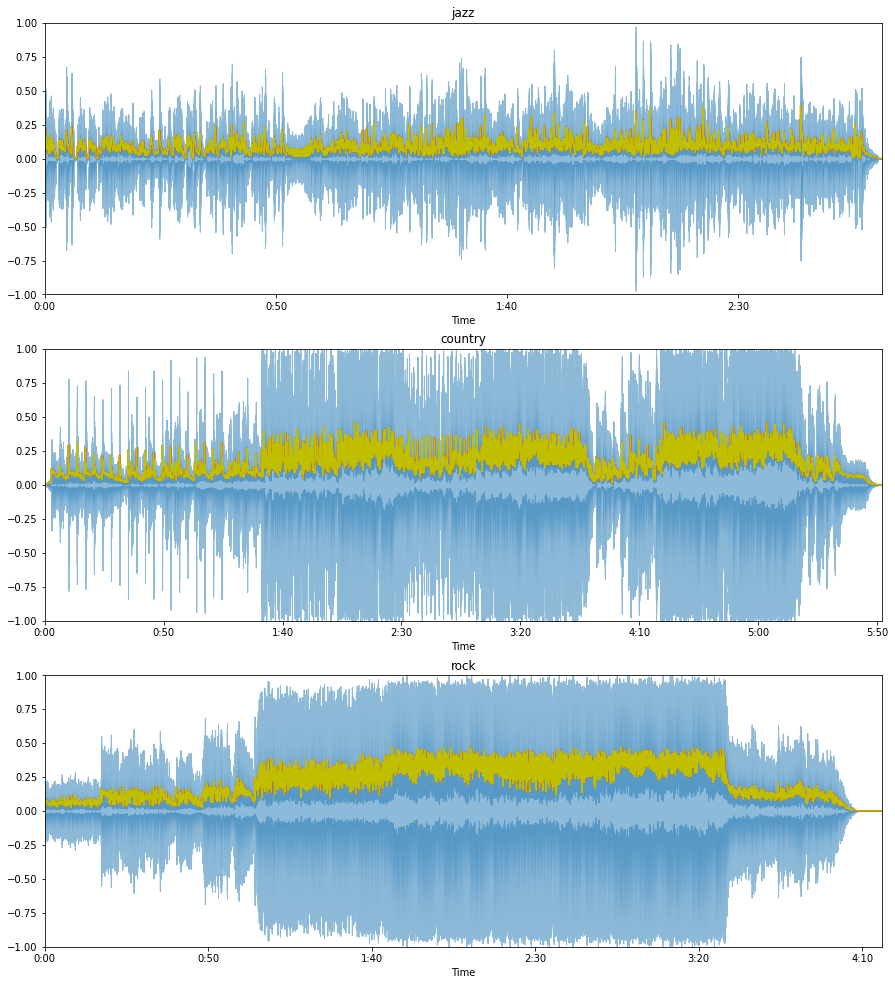

In [22]:
#Visalize RMSE for each song

plt.figure(figsize=(15,17))


plt.subplot(3,1,1)
librosa.display.waveplot(jazz, alpha=0.5)
frames = range(0, rms_jazz.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, rms_jazz, color='r')
plt.plot(t, rms1_jazz, color='y')
plt.title('jazz')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(country, alpha=0.5)
frames = range(0, rms_country.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, rms_country, color='r')
plt.plot(t, rms1_country, color='y')
plt.title('country')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(rock, alpha=0.5)
frames = range(0, rms_rock.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, rms_rock, color='r')
plt.plot(t, rms1_rock, color='y')
plt.title('rock')
plt.ylim((-1,1))

plt.show()


## Zero crossing rate
- number of times a signal crosses the horizontal axis
- recognition of percussive vs pitched sounds
- monophonic pitch estimation (crude algorithm)
- voiced/unvoiced descision for speech signals

In [23]:
#extract ZCR with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512
zcr_jazz = librosa.feature.zero_crossing_rate(jazz, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_country = librosa.feature.zero_crossing_rate(country, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_rock = librosa.feature.zero_crossing_rate(rock, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [ ]:
# Visually compare zero crossing rates of each song
plt.figure(figsize=(15,17))


plt.subplot(3,1,1)
librosa.display.waveplot(jazz, alpha=0.5)
frames = range(0, rms_jazz.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, rms_jazz, color='r')
plt.plot(t, rms1_jazz, color='y')
plt.title('jazz')
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(country, alpha=0.5)
frames = range(0, rms_country.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, rms_country, color='r')
plt.plot(t, rms1_country, color='y')
plt.title('country')
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(rock, alpha=0.5)
frames = range(0, rms_rock.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.plot(t, rms_rock, color='r')
plt.plot(t, rms1_rock, color='y')
plt.title('rock')
plt.ylim((-1,1))

plt.show()

# Frequency-Domain Features

In [ ]:
# frequency-domain feature pipeline

# ADC -> Framing -> 
# Windowing (windowing function to each frame-Hann window) ->
# Overlap windowed frames (Frame size K, hop length/size) ->
# FFT -> 
# aggregation -> 
# feature value/vector/matrix